In [ ]:
#In this dataset, there are total 1460 homes data with few dozen features of types : float, integer, and categorical. 
#Im going to create a regression model to estimate home's price using: random trees & random forests

In [41]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline


In [42]:
#Import the training and testing dataset
train = pd.read_csv('train.csv')
train_original = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [43]:
# It looks like we have int, float & object type features.
#And also some of the features pretain to a small portion of 
#the 1460 smaples. For now, Let's ingore these features where 
#data is missing.

# Preprocessing Categorical Features

In [44]:
#Let's declare a quick function to convert categorical features 
#into integer features, with the most common category of the 
#feature being converted to integer 0, the next common to 1 and 
#so on.This maybe useful later. 

In [45]:
#Converting categorical feature into int feature

def getObjectFeature(df, col, datalength=1460):
    if df[col].dtype!='object':
        print('Feature',col,'is not an object feature.')
        return df
    elif len([i for i in df[col].T.notnull() if i == True]) != datalength:
        #if there is missing data
        print('feature', col, 'is missing data.')
        return df
    else:
        df1 = df
        counts = df1[col].value_counts() #get the counts for each labelfor
        #the feature
        df1[col] =[counts.index.tolist().index(i) for i in df1[col]]
        #do the conversion
        return df1
        #make the new int column from the conversion
#test the function
fcntest = getObjectFeature(train,'LotShape')
fcntest.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


# Target variable Analysis

In [46]:
#let's take a look at the sale price data and check for normality 
#and try to correct it

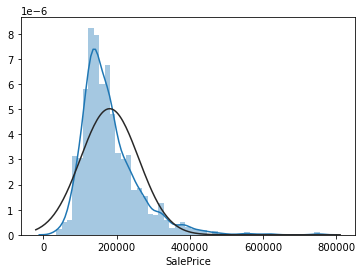

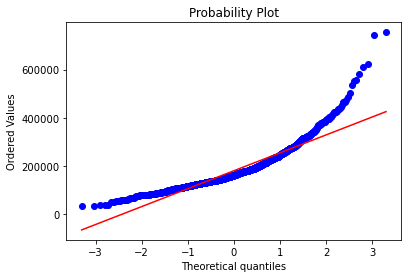

In [47]:
#histogram and normal probablity plot
from scipy.stats import norm
sns.distplot(train['SalePrice'],fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot=plt)

In [48]:
# so, certainly not normal: we have right skeweness and the data is bit peaky. 
#Lets apply a log transform on the data and see what happens

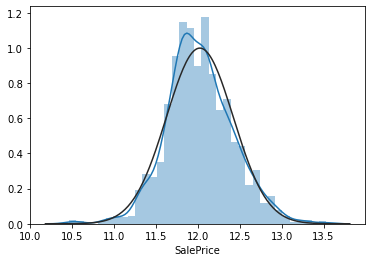

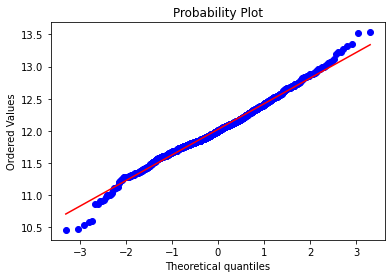

In [49]:
train['SalePrice'] = np.log(train['SalePrice'])
sns.distplot(train['SalePrice'], fit=norm)
fig= plt.figure()
res = stats.probplot(train['SalePrice'],plot=plt)

In [50]:
#Now this looks much better

In [51]:
#Now apply

# Random Tree Regressor

In [52]:
# we will go for a simple decision tree regressor with features: Year,Month of Sale, Lot square footage, Number of bedrooms, 
#we can test for performance and overfitting using k-fold validation, k=10 we take.

In [53]:
from sklearn.tree import DecisionTreeRegressor as dtr
#defining the training data X
X = train[['MoSold','YrSold','LotArea','BedroomAbvGr']]
Y = train[['SalePrice']]
#and the data for competetion submission
X_test = test[['MoSold','YrSold','LotArea','BedroomAbvGr']]
print(X.head())
print(Y.head())

   MoSold  YrSold  LotArea  BedroomAbvGr
0       2    2008     8450             3
1       5    2007     9600             3
2       9    2008    11250             3
3       2    2006     9550             3
4      12    2008    14260             4
   SalePrice
0  12.247694
1  12.109011
2  12.317167
3  11.849398
4  12.429216


In [54]:
#Now we can use cross validation


In [55]:
from sklearn.model_selection import cross_val_score
DTR_1 = dtr(max_depth = None) #declare the regression model from. Let the depth be default
#DTR_1.fit(X,Y) #fit the training data
scores_dtr = cross_val_score(DTR_1, X,Y, cv=10, scoring='explained_variance')
print('scores for k=10 fold validation:', scores_dtr)
print('Est. explained variance : %0.2f (+/- %0.2f)' % (scores_dtr.mean(), scores_dtr.std()*2))

scores for k=10 fold validation: [-0.42099584 -0.363452   -0.35750455 -0.30144625 -0.17037433 -0.65073286
 -0.57154942 -0.64197985 -1.15471624 -0.35105134]
Est. explained variance : -0.50 (+/- 0.53)


In [56]:
#It looks like a so bad model. Let's use Random Forest regressor instead.

In [57]:
from sklearn.ensemble import RandomForestRegressor as rfr
estimators = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
mean_rfrs = []
std_rfrs_upper = []
std_rfrs_lower = []
yt = [i for i in Y['SalePrice']] # quick pre-processing of the target
np.random.seed(11111)
for i in estimators:
    model = rfr(n_estimators=i,max_depth=None)
    scores_rfr = cross_val_score(model,X,yt,cv=10,scoring='explained_variance')
    print('estimators:',i)
#     print('explained variance scores for k=10 fold validation:',scores_rfr)
    print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
    print('')
    mean_rfrs.append(scores_rfr.mean())
    std_rfrs_upper.append(scores_rfr.mean()+scores_rfr.std()*2) # for error plotting
    std_rfrs_lower.append(scores_rfr.mean()-scores_rfr.std()*2) # for error plotting


estimators: 2
Est. explained variance: -0.16 (+/- 0.23)

estimators: 5
Est. explained variance: 0.01 (+/- 0.26)

estimators: 10
Est. explained variance: 0.10 (+/- 0.20)

estimators: 15
Est. explained variance: 0.12 (+/- 0.21)

estimators: 20
Est. explained variance: 0.15 (+/- 0.16)

estimators: 25
Est. explained variance: 0.14 (+/- 0.19)

estimators: 30
Est. explained variance: 0.13 (+/- 0.21)

estimators: 35
Est. explained variance: 0.16 (+/- 0.17)

estimators: 40
Est. explained variance: 0.15 (+/- 0.16)

estimators: 45
Est. explained variance: 0.16 (+/- 0.16)

estimators: 50
Est. explained variance: 0.15 (+/- 0.18)

estimators: 55
Est. explained variance: 0.16 (+/- 0.18)

estimators: 60
Est. explained variance: 0.16 (+/- 0.19)

estimators: 65
Est. explained variance: 0.15 (+/- 0.19)

estimators: 70
Est. explained variance: 0.16 (+/- 0.18)

estimators: 75
Est. explained variance: 0.16 (+/- 0.18)

estimators: 80
Est. explained variance: 0.16 (+/- 0.18)



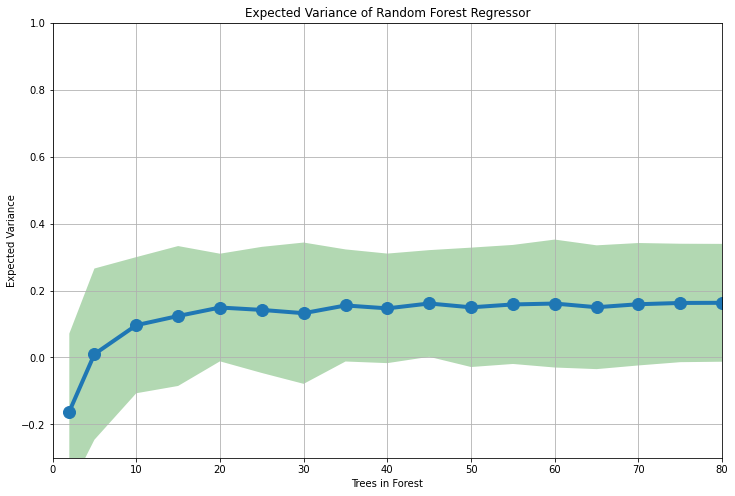

In [58]:
#and plot

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(estimators, mean_rfrs, marker='o', linewidth=4, markersize=12)
ax.fill_between(estimators, std_rfrs_lower, std_rfrs_upper, facecolor='green',alpha=0.3, interpolate=True)
ax.set_ylim([-.3,1])
ax.set_xlim([0,80])
plt.title('Expected Variance of Random Forest Regressor')
plt.ylabel('Expected Variance')
plt.xlabel('Trees in Forest')
plt.grid()
plt.show()

In [59]:
#Yeah, the results are still absolutely awful. But, at least the 
#estimated means for explained variance are positive, which is a
#small improvement. We probably need more features, considering 
#how poor even heavily populated forests perform. Let's start by 
#adding a few more features and seeing what happens...

In [60]:
#list all the features we want. This is still arbitary.
included_features = ['MoSold','YrSold','LotArea','BedroomAbvGr','FullBath','HalfBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','LotShape','Utilities']
#define the training data X
X = train[included_features]
Y = train[['SalePrice']]
#and the data for the competetion submission
X_test = test[included_features]
#transform categorical data if included in X....
for col in list (X):
    if X[col].dtype == 'object':
        X = getObjectFeature(X, col)
X.head()

C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,MoSold,YrSold,LotArea,BedroomAbvGr,FullBath,HalfBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,LotShape,Utilities
0,2,2008,8450,3,2,1,8,2003,2003,0,0
1,5,2007,9600,3,2,0,6,1976,1976,0,0
2,9,2008,11250,3,2,1,6,2001,2002,1,0
3,2,2006,9550,3,1,0,7,1915,1970,1,0
4,12,2008,14260,4,2,1,9,2000,2000,1,0


In [61]:
# define the number of estimators to consider
estimators = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
mean_rfrs = []
std_rfrs_upper = []
std_rfrs_lower = []
yt = [i for i in Y['SalePrice']]
np.random.seed(11111)
#for each number of estimators , fit the model and find the results for B-fold 
#cross validation
for i in estimators:
    model = rfr(n_estimators=i,max_depth=None)
    scores_rfr = cross_val_score(model,X,yt,cv=10,scoring='explained_variance')
    print('estimators:', i)
    #print the explained variance scores for k=10 cross validation
    print('Est. explained variance: %0.2f (+/- %0.2f)' % (scores_rfr.mean(),scores_rfr.std()*2))
    print('')
    mean_rfrs.append(scores_rfr.mean())
    std_rfrs_upper.append(scores_rfr.mean() + scores_rfr.std()*2) # for error or plotting
    std_rfrs_lower.append(scores_rfr.mean() - scores_rfr.std()*2) #for error plotting
    

estimators: 2
Est. explained variance: 0.58 (+/- 0.17)

estimators: 5
Est. explained variance: 0.67 (+/- 0.09)

estimators: 10
Est. explained variance: 0.69 (+/- 0.10)

estimators: 15
Est. explained variance: 0.69 (+/- 0.09)

estimators: 20
Est. explained variance: 0.70 (+/- 0.09)

estimators: 25
Est. explained variance: 0.70 (+/- 0.10)

estimators: 30
Est. explained variance: 0.71 (+/- 0.08)

estimators: 35
Est. explained variance: 0.71 (+/- 0.09)

estimators: 40
Est. explained variance: 0.71 (+/- 0.10)

estimators: 45
Est. explained variance: 0.72 (+/- 0.08)

estimators: 50
Est. explained variance: 0.71 (+/- 0.09)

estimators: 55
Est. explained variance: 0.72 (+/- 0.09)

estimators: 60
Est. explained variance: 0.72 (+/- 0.10)

estimators: 65
Est. explained variance: 0.71 (+/- 0.08)

estimators: 70
Est. explained variance: 0.71 (+/- 0.09)

estimators: 75
Est. explained variance: 0.72 (+/- 0.09)

estimators: 80
Est. explained variance: 0.72 (+/- 0.09)



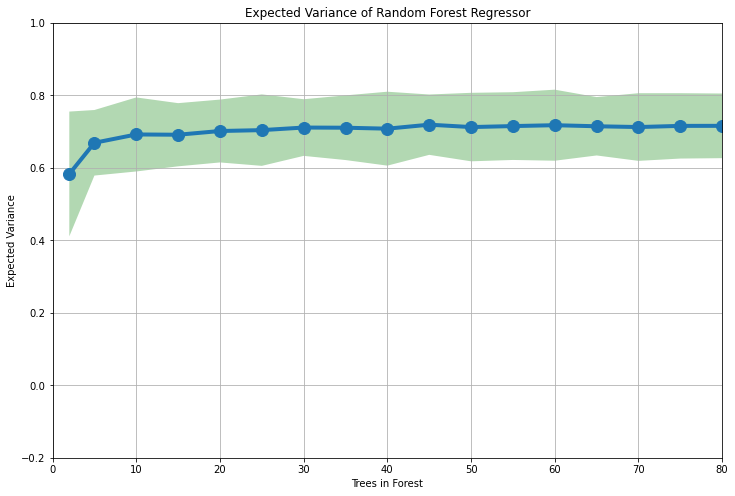

In [62]:
#Now plot again
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(estimators, mean_rfrs, marker='o',linewidth=4,markersize=12)
ax.fill_between(estimators, std_rfrs_lower, std_rfrs_upper, facecolor='green',alpha=0.3, interpolate=True)
ax.set_ylim([-.2,1])
ax.set_xlim([0,80])
plt.title('Expected Variance of Random Forest Regressor')
plt.ylabel('Expected Variance')
plt.xlabel('Trees in Forest')
plt.grid()
plt.show()

In [63]:
#It is clearly preety better 

In [ ]:
#Let's stick with random forest regression for now, but let's try to be more scientific about the features we select for training the forests. Let's do some feature analysis.

#First, let's collect all the available features and transform the categorical features where necessary....

In [64]:
import sklearn.feature_selection as fs
train = pd.read_csv('train.csv')
train['SalePrice'] = np.log(train['SalePrice'])
#First let's include every feature that has data for all 1460 houses in the data set
included_features = [col for col in list(train) 
                    if len([i for i in train[col].T.notnull() if i== True])==1460 and col != 'SalePrice' and col!='id']
#define the training data X
X = train[included_features] #the feature data
Y = train[['SalePrice']] #the target
yt = [i for i in Y['SalePrice']] #the target list
#and the data for the competetion submission
X_test = test[included_features]
#transform categorical data if included in X..
for col in list(X):
    if X[col].dtype == 'object':
        X = getObjectFeature(X,col)
X.head()


C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,0,8450,0,0,0,0,0,0,...,61,0,0,0,0,0,2,2008,0,0
1,2,20,0,9600,0,0,0,0,3,0,...,0,0,0,0,0,0,5,2007,0,0
2,3,60,0,11250,0,1,0,0,0,0,...,42,0,0,0,0,0,9,2008,0,0
3,4,70,0,9550,0,1,0,0,1,0,...,35,272,0,0,0,0,2,2006,0,2
4,5,60,0,14260,0,1,0,0,3,0,...,84,0,0,0,0,0,12,2008,0,0


# Mutual Information Regression Metric for Feature Ranking

We will use mutual information regression for feature ranking anf selection. This metric measures the dependence between two random variables, in this case each feature in the data set and the sale price regression target. Note that this doesn't consider combinations of feature values (for example: the dependence between sales price and the year of sale combined with overall quality), which may also be useful.

In [65]:
mir_result = fs.mutual_info_regression(X,yt) #mutual information regression feature ordering
feature_scores = []
for i in np.arange(len(included_features)):
    feature_scores.append([included_features[i], mir_result[i]])
sorted_scores = sorted(np.array(feature_scores), key=lambda s: float(s[1]), reverse = True)
print(np.array(sorted_scores))


[['OverallQual' '0.5136381721742793']
 ['GrLivArea' '0.3703627611744371']
 ['GarageCars' '0.36306786180931905']
 ['KitchenQual' '0.3338163973982087']
 ['ExterQual' '0.3287640972504198']
 ['GarageArea' '0.2885644188969745']
 ['TotalBsmtSF' '0.2659845106806378']
 ['FullBath' '0.2622707877138404']
 ['1stFlrSF' '0.2619947306281647']
 ['YearBuilt' '0.2596084333686104']
 ['YearRemodAdd' '0.1960082277699473']
 ['Foundation' '0.19562658098485675']
 ['TotRmsAbvGrd' '0.1915020533249101']
 ['Fireplaces' '0.17031997732270887']
 ['HeatingQC' '0.16995592191050113']
 ['BsmtFinSF1' '0.13108811121442643']
 ['MSZoning' '0.12148616668761925']
 ['OverallCond' '0.11349373486797587']
 ['2ndFlrSF' '0.10867375088832265']
 ['LotShape' '0.0979153207264496']
 ['HalfBath' '0.08768083621946698']
 ['LotArea' '0.08751873685816003']
 ['SaleType' '0.07861772114711596']
 ['SaleCondition' '0.07460727173171389']
 ['BedroomAbvGr' '0.0676400172657381']
 ['CentralAir' '0.06392230608117333']
 ['MSSubClass' '0.062148659699976

# MIR Results: what do homebuyers care about?


Well, it seems like the most important factors (with respect to sales price) are overall quality, amount of living area, garage car capacity, kitchen quality, and exterior material quality. These seem like fairly intuitve results, at least for somebody with a distant notion of what matters when selecting a house (me).

Let's plot the results next to each other for a better visualization...

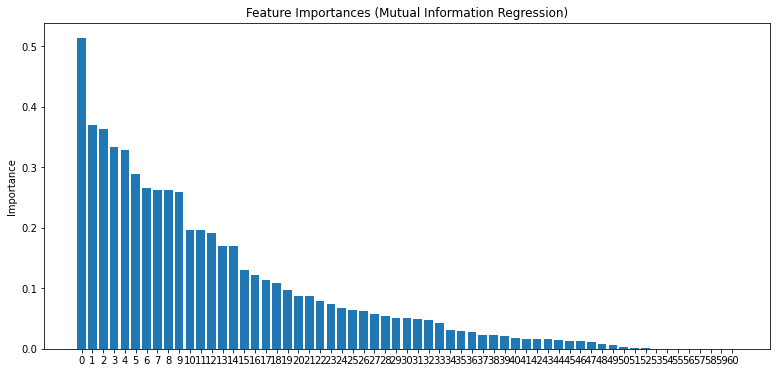

In [66]:
#plot
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(111)
ind = np.arange(len(included_features))
plt.bar(ind, [float(i) for i in np.array(sorted_scores)[:,1]])
ax.axes.set_xticks(ind)
plt.title('Feature Importances (Mutual Information Regression)')
plt.ylabel('Importance')
#plt.xlabel('trees in forest')
#plt.grid()
plt.show()

# Feature Purning 

It seems like the top few dozen features are fairly important...let's take the top 15,20,30,40 and 50 features to train the random forest regressor model we have been working with and compare the performances. We will wrap the necessary model building and plotting code in function first.

In [67]:
# define a function to do the necessary model building....
def getModel(sorted_scores,train,numFeatures):
    included_features = np.array(sorted_scores)[:,0][:numFeatures] # ordered list of important features
    # define the training data X...
    X = train[included_features]
    Y = train[['SalePrice']]
    # transform categorical data if included in X...
    for col in list(X):
        if X[col].dtype=='object':
            X = getObjectFeature(X, col)
    # define the number of estimators to consider
    estimators = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
    mean_rfrs = []
    std_rfrs_upper = []
    std_rfrs_lower = []
    yt = [i for i in Y['SalePrice']]
    np.random.seed(11111)
    # for each number of estimators, fit the model and find the results for 8-fold cross validation
    for i in estimators:
        model = rfr(n_estimators=i,max_depth=None)
        scores_rfr = cross_val_score(model,X,yt,cv=10,scoring='explained_variance')
        mean_rfrs.append(scores_rfr.mean())
        std_rfrs_upper.append(scores_rfr.mean()+scores_rfr.std()*2) # for error plotting
        std_rfrs_lower.append(scores_rfr.mean()-scores_rfr.std()*2) # for error plotting
    return mean_rfrs,std_rfrs_upper,std_rfrs_lower

# define a function to plot the model expected variance results...
def plotResults(mean_rfrs,std_rfrs_upper,std_rfrs_lower,numFeatures):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.plot(estimators,mean_rfrs,marker='o',
           linewidth=4,markersize=12)
    ax.fill_between(estimators,std_rfrs_lower,std_rfrs_upper,
                    facecolor='green',alpha=0.3,interpolate=True)
    ax.set_ylim([-.2,1])
    ax.set_xlim([0,80])
    plt.title('Expected Variance of Random Forest Regressor: Top %d Features'%numFeatures)
    plt.ylabel('Expected Variance')
    plt.xlabel('Trees in Forest')
    plt.grid()
    plt.show()
    return

Now, let's run the regression model fitting for each of the scenarios listed before.

In [68]:
from ipykernel import kernelapp as app

C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


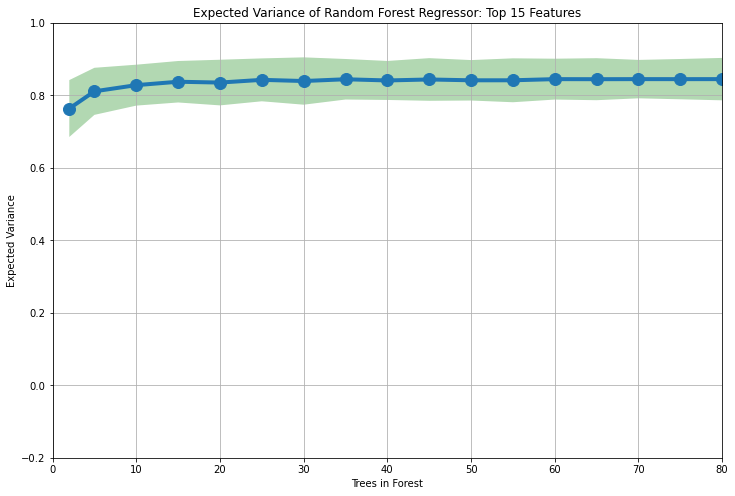

In [69]:
# top 15...
mean_rfrs,std_rfrs_upper,std_rfrs_lower = getModel(sorted_scores,train,15)
plotResults(mean_rfrs,std_rfrs_upper,std_rfrs_lower,15)


C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


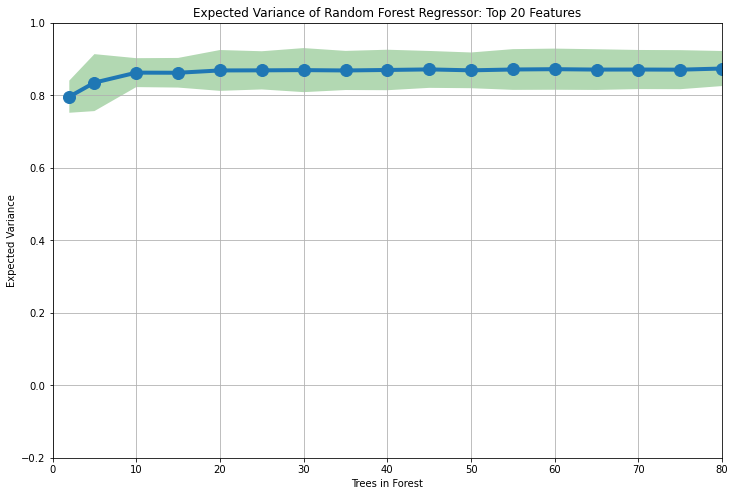

In [70]:
# top 20...
mean_rfrs,std_rfrs_upper,std_rfrs_lower = getModel(sorted_scores,train,20)
plotResults(mean_rfrs,std_rfrs_upper,std_rfrs_lower,20)

In [ ]:
# top 30...
mean_rfrs,std_rfrs_upper,std_rfrs_lower = getModel(sorted_scores,train,30)
plotResults(mean_rfrs,std_rfrs_upper,std_rfrs_lower,30)

In [ ]:
# top 40...
mean_rfrs,std_rfrs_upper,std_rfrs_lower = getModel(sorted_scores,train,40)
plotResults(mean_rfrs,std_rfrs_upper,std_rfrs_lower,40)

In [ ]:
# top 50...
mean_rfrs,std_rfrs_upper,std_rfrs_lower = getModel(sorted_scores,train,50)
plotResults(mean_rfrs,std_rfrs_upper,std_rfrs_lower,50)

In [71]:
# build the model with the desired parameters...
numFeatures = 40 # the number of features to inlcude
trees = 60 # trees in the forest
included_features = np.array(sorted_scores)[:,0][:numFeatures]
# define the training data X...
X = train[included_features]
Y = train[['SalePrice']]
# transform categorical data if included in X...
for col in list(X):
    if X[col].dtype=='object':
        X = getObjectFeature(X, col)
yt = [i for i in Y['SalePrice']]
np.random.seed(11111)
model = rfr(n_estimators=trees,max_depth=None)
scores_rfr = cross_val_score(model,X,yt,cv=10,scoring='explained_variance')
print('explained variance scores for k=10 fold validation:',scores_rfr)
print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
# fit the model
model.fit(X,yt)

C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


explained variance scores for k=10 fold validation: [0.84668678 0.89725768 0.89726735 0.84429471 0.86616805 0.90143275
 0.88770254 0.90005939 0.8481834  0.85985946]
Est. explained variance: 0.87 (+/- 0.05)


RandomForestRegressor(n_estimators=60)

In [72]:
# let's read the test data to be sure...
test = pd.read_csv('test.csv')

In [73]:
# re-define a function to convert an object (categorical) feature into an int feature
# 0 = most common category, highest int = least common.
def getObjectFeature(df, col, datalength=1460):
    if df[col].dtype!='object': # if it's not categorical..
        print('feature',col,'is not an object feature.')
        return df
    else:
        df1 = df
        counts = df1[col].value_counts() # get the counts for each label for the feature
#         print(col,'labels, common to rare:',counts.index.tolist()) # get an ordered list of the labels
        df1[col] = [counts.index.tolist().index(i) 
                    if i in counts.index.tolist() 
                    else 0 
                    for i in df1[col] ] # do the conversion
        return df1 # make the new (integer) column from the conversion

In [74]:
# apply the model to the test data and get the output...
X_test = test[included_features]
for col in list(X_test):
    if X_test[col].dtype=='object':
        X_test = getObjectFeature(X_test, col, datalength=1459)
# print(X_test.head(20))
y_output = model.predict(X_test.fillna(0)) # get the results and fill nan's with 0
print(y_output)

C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[11.77143109 11.94109789 12.08597025 ... 11.97899137 11.65568481
 12.35762795]


In [75]:
# transform the data to be sure
y_output = np.exp(y_output)
print(y_output)

[129499.34330374 153445.06428634 177365.92566496 ... 159371.20355745
 115345.21860237 232728.53013525]


In [76]:
# define the data frame for the results
saleprice = pd.DataFrame(y_output, columns=['SalePrice'])
# print(saleprice.head())
# saleprice.tail()
results = pd.concat([test['Id'],saleprice['SalePrice']],axis=1)
results.head()

,Id,SalePrice
0,1461,129499.343304
1,1462,153445.064286
2,1463,177365.925665
3,1464,182672.925848
4,1465,193522.853820
